# Create testing and training sets

In [91]:
!export PATH=/Library/TeX/texbin:$PATH

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# read the csv file 
# will take in any cleaned dataset and the rest of the code will work
data_df = pd.read_csv("heart.csv", sep=",")

In [14]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
cardio_df.head()

In [ ]:
# checking the null values
cardio_df.isnull().sum()

In [ ]:
# Checking the dataframe information

cardio_df.info()

In [ ]:
# Statistical summary of the dataframe
cardio_df.describe()

In [17]:
data_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
df_target = data_df['target']
df_final = data_df.drop(columns =['target'])
X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)



In [19]:
# install xgboost

!pip install xgboost

In [20]:
# use xgboost model in local mode

# note that we have not performed any normalization or scaling since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# It doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier(learning_rate =0.01, n_estimators = 500, max_depth = 20)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
# make predictions on test data

predict = model.predict(X_test)

In [ ]:
predict

In [ ]:
# Assess trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

In [ ]:
# print metrics for training dataset

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

In [ ]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

In [ ]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

MINI CHALLENGE
- Attempt to tune the XGBoost classifier using gridsearch, start with the param_grid listed below
- Check out these great resources: https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e


In [ ]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [ ]:
y_predict_optim = grid.predict(X_test)

In [ ]:
y_predict_optim

In [ ]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

# TASK #7: PERFORM DIMENSIONALITY REDUCTION USING PCA ( USING SAGEMAKER)

In [21]:
# Create sagemaker session
import sagemaker
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()
bucket = 'finalproject-jmd'
prefix = 'Data'

In [22]:
import io 
import numpy as np
import sagemaker.amazon.common as smac

# Covert the data in numpy array format to RecordIO format

buf = io.BytesIO()
df_matrix = df_final.to_numpy() 
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)

0

In [23]:
import os

# Upload RecordIO data to S3
 
key = 'pca'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)

print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://finalproject-jmd/Data/train/pca


In [24]:
# create output placeholder in S3 bucket to store the PCA output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://finalproject-jmd/Data/output


In [25]:
# Get the training container of sagemaker built-in algorithms

from sagemaker.amazon.amazon_estimator import get_image_uri


container = get_image_uri(boto3.Session().region_name, 'pca')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [26]:
# Assuming df_final is a pandas DataFrame
feature_dim = df_final.shape[1]  # Number of columns in df_final
num_components = round(feature_dim / 2)  # Rounded value of half of the number of columns in df_final
role = sagemaker.get_execution_role()

pca = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count=1, 
                                       instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# Set hyperparameters with the calculated values for feature_dim and num_components
pca.set_hyperparameters(feature_dim=feature_dim,
                        num_components=num_components,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)

# Pass in the training data from S3 to train the PCA model
pca.fit({'train': s3_train_data})


INFO:sagemaker:Creating training-job with name: pca-2023-04-21-00-40-27-629


2023-04-21 00:40:28 Starting - Starting the training job...
2023-04-21 00:40:43 Starting - Preparing the instances for training......
2023-04-21 00:41:50 Downloading - Downloading input data...
2023-04-21 00:42:10 Training - Downloading the training image......
2023-04-21 00:43:31 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/21/2023 00:43:41 INFO 140610297489216] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[04/21/2023 00:43:41 INFO 140610297489216] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'algorithm_mode': 'regular', 'feature_dim': '13', 'min

# TASK #8: DEPLOY THE TRAINED PCA MODEL 

In [27]:
# Deploy the model to perform inference 

pca_reduction = pca.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: pca-2023-04-21-00-44-19-976
INFO:sagemaker:Creating endpoint-config with name pca-2023-04-21-00-44-19-976
INFO:sagemaker:Creating endpoint with name pca-2023-04-21-00-44-19-976


-------!

In [28]:
from sagemaker.predictor import csv_serializer, json_deserializer

pca_reduction.serializer = csv_serializer
pca_reduction.deserializer = json_deserializer

In [29]:
# make prediction on the test data

result = pca_reduction.predict(np.array(df_final))

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [89]:
result.head # results are in Json format

AttributeError: 'dict' object has no attribute 'head'

In [31]:
# Access the scores by iterating through the scores in the predictions
predictions = np.array([r['projection'] for r in result['projections']])

In [32]:
predictions

array([[  1.48361242,  -1.3243351 ,  -2.9745152 ,  11.41938305,
         34.68186951, 300.28353882],
       [ -0.89691937,  -2.30761814,   1.26717639,  -8.82221508,
         37.06412506, 293.60067749],
       [ -0.7511096 ,  -1.00278902, -13.22694492, -38.1978035 ,
         37.50273895, 262.29544067],
       ...,
       [  0.57022065,  -0.3895486 ,   2.31815076,   4.14320421,
        -44.58388138, 319.14819336],
       [  0.76163965,   0.49166626,  -3.42524028,  23.7599144 ,
         -3.28719687, 322.20373535],
       [  0.46566945,  -0.56223774,  -5.34691   , -19.44548988,
         10.09546471, 254.81996155]])

In [33]:
predictions.shape

(1025, 6)

In [34]:
# Delete the end-point

pca_reduction.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pca-2023-04-21-00-44-19-976
INFO:sagemaker:Deleting endpoint with name: pca-2023-04-21-00-44-19-976


# TASK #9: TRAIN AND EVALUATE XGBOOST MODEL ON DATA AFTER DIMENSIONALITY REDUCTION (USING SAGEMAKER)

In [35]:
predictions.shape

(1025, 6)

In [36]:
# Convert the array into dataframe with the target varibale set as the first column

train_data = pd.DataFrame({'Target':df_target})
train_data

,Target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [37]:
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]
    train_data.head()

In [38]:
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

922

In [57]:
# shuffle the data and split into train, test and validation sets.

import sklearn 
from sklearn.model_selection import train_test_split

train_data = sklearn.utils.shuffle(train_data)

# Split the dataset into train and test sets (80% train, 20% test)
train, test = train_test_split(train_data, test_size=0.2, random_state=42)

# Further split the train_df into train and validation sets (80% train, 20% validation)
train, valid = train_test_split(train, test_size=0.25, random_state=42)

In [58]:
train.shape, test.shape,valid.shape

((615, 7), (205, 7), (205, 7))

In [59]:
X_test, y_test = test.drop(columns = ['Target']), test['Target']

In [60]:
# save train_data and validation_data as csv files

train.to_csv('train.csv',header = False, index = False)
valid.to_csv('valid.csv',header = False, index = False)

In [61]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [62]:
# read the data and upload to s3 bucket
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
    
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://finalproject-jmd/XGBoost-Classifier/train/XGBoost-Classifier


In [63]:
with open('valid.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

uploaded validation data location: s3://finalproject-jmd/XGBoost-Classifier/valid/XGBoost-Classifier


In [64]:
# create output placeholder

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://finalproject-jmd/XGBoost-Classifier/output


In [65]:
# Get the training container of sagemaker built-in algorithms for XGBoost

container = get_image_uri(boto3.Session().region_name, 'xgboost','1.5-1')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [66]:
# Pass container into estimator

Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# Runs the hyperparameters tuning job

Xgboost_classifier.set_hyperparameters(max_depth=3,
                           objective='multi:softmax',
                           num_class= 2,
                           eta = 0.5,
                           num_round = 150
                           )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [67]:
# Creates train and validation channels

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_valid_data, content_type='csv',s3_data_type = 'S3Prefix')

Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-04-21-01-18-39-121


2023-04-21 01:18:39 Starting - Starting the training job...
2023-04-21 01:19:02 Starting - Preparing the instances for training......
2023-04-21 01:19:54 Downloading - Downloading input data...
2023-04-21 01:20:24 Training - Downloading the training image...
2023-04-21 01:21:10 Training - Training image download completed. Training in progress..[2023-04-21 01:21:19.214 ip-10-0-147-223.us-east-2.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-04-21 01:21:19.296 ip-10-0-147-223.us-east-2.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2023-04-21:01:21:19:INFO] Imported framework sagemaker_xgboost_container.training
[2023-04-21:01:21:19:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2023-04-21:01:21:19:INFO] No GPUs detected (normal if no gpus installed)
[2023-04-21:01:21:19:INFO] Running XGBoost Sagemaker in algorithm mode
[2023-04-21:01:21:19:INFO] Determined 0 GPU

# Model Depolyment

In [68]:
Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-04-21-01-27-52-607
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-04-21-01-27-52-607
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-04-21-01-27-52-607


-----!

In [69]:
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_classifier.serializer = csv_serializer


In [70]:
# make prediction

XGB_prediction = Xgboost_classifier.predict(np.array(X_test))

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [76]:
XGB_prediction

b'0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n1.0

In [79]:
import numpy as np

def bytes_2_array(x):
    
    # Decode bytes to string and replace escape characters
    x_str = x.decode("utf-8").replace("\\n", "\n")
    
    # Split string based on '\n'
    l = x_str.split('\n')
    
    # Remove the empty last element
    l.pop(-1)
    
    # Convert the list of strings to a list of float values
    l = [float(i) for i in l]
    
    # Convert the list to a NumPy array and reshape it to a 2D array
    l = np.array(l).astype('float32').reshape(-1, 1)
    
    return l

predicted_values = bytes_2_array(XGB_prediction)


In [80]:
predicted_values = bytes_2_array(XGB_prediction)

In [81]:
predicted_values

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [83]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [84]:
y_test

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [85]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

Precision = 0.9494087354567995
Recall = 0.9553140096618358
Accuracy = 0.9512195121951219


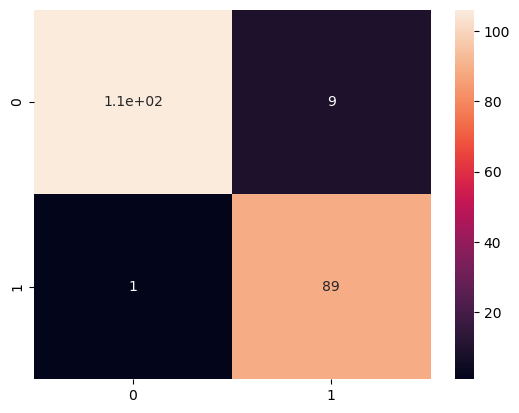

In [86]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True)

In [87]:
# Delete the end-point

Xgboost_classifier.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-04-21-01-27-52-607
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-04-21-01-27-52-607
